In [2]:
import pyodbc 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

conn = pyodbc.connect(
    'Driver={SQL Server};'
    'Server=DESKTOP-LOS49QD\SQLEXPRESS;'
    'Database=AdventureWorks2022;'
    'Trusted_Connection=yes;'
)
import warnings
warnings.filterwarnings('ignore')

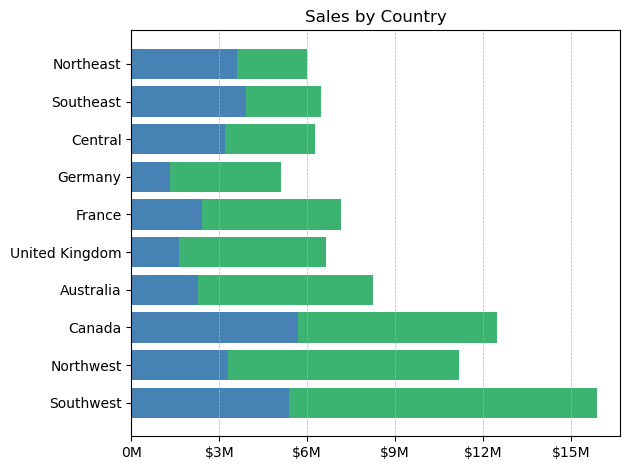

In [ ]:
##Q1A Sales Last Year and Year to Date by Region
query = """
with total_sales as(select TerritoryID, 
sum(TotalDue) as Total_Sales 
from sales.SalesOrderHeader
where OrderDate between '2013-07-01' and '2014-06-30'
group by TerritoryID)
select t.TerritoryID,s.Name, 
cast(t.Total_Sales as decimal(18,2)) as Total_Sales,
cast(s.SalesYTD as decimal(18,2)) as SalesYTD,
cast(s.SalesLastYear as decimal(18,2)) as SalesLastYear
from total_sales as t
inner join sales.SalesTerritory as s
on t.TerritoryID=s.TerritoryID
order by total_sales desc


"""
df = pd.read_sql_query(query, conn)
df.head()
plt.barh(df['Name'],df['SalesLastYear'],
         label='SaleLY',color='steelblue')
plt.barh(df['Name'],df['SalesYTD'],
         label='SalesYTD',color='mediumseagreen',left=df['SalesLastYear'])
plt.xticks(ticks = [0,3000000,6000000,9000000,12000000,15000000],
          labels = ["0M","$3M","$6M","$9M","$12M","$15M"])
plt.title('Sales by Country')
plt.tight_layout()
plt.grid(axis='x',linestyle='--',linewidth=0.5)

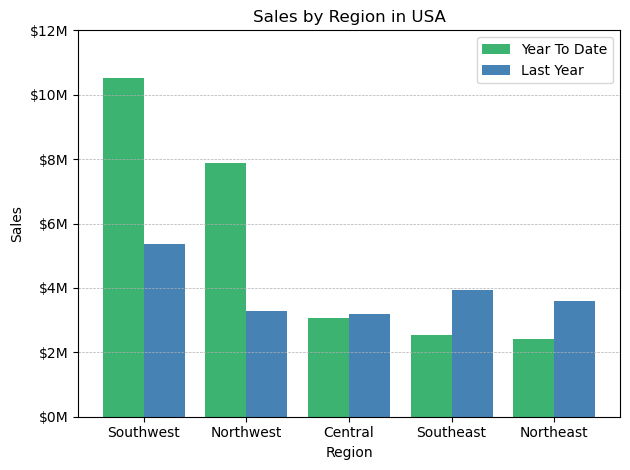

In [ ]:
##Q1B Sales Last Year and Year To Date By Region in USA 

query=""" 
select name as Name,
cast(sum(SalesYTD) as decimal(18,2)) as SalesYTD,
cast(sum(SalesLastYear) as decimal (18,2)) as SalesLastYear
from sales.SalesTerritory 
where CountryRegionCode='US'
group by name
order by sum(SalesYTD) desc

"""

df_us=pd.read_sql_query(query,conn)
df_us

X_axis=np.arange(len(df_us['Name']))
plt.bar(X_axis-0.2,df_us['SalesYTD'],0.4,
        label='Year To Date',color='mediumseagreen')
plt.bar(X_axis+0.2,df_us['SalesLastYear'],0.4,
        label='Last Year',color='steelblue')
plt.xticks(X_axis,df_us['Name'])
plt.yticks(ticks = [0,2000000,4000000,6000000,8000000,10000000,12000000],
          labels = ["$0M","$2M","$4M","$6M","$8M","$10M","$12M"])
plt.title('Sales by Region in USA')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.legend()
plt.grid(axis='y',linestyle='--',linewidth=0.5)
plt.tight_layout()




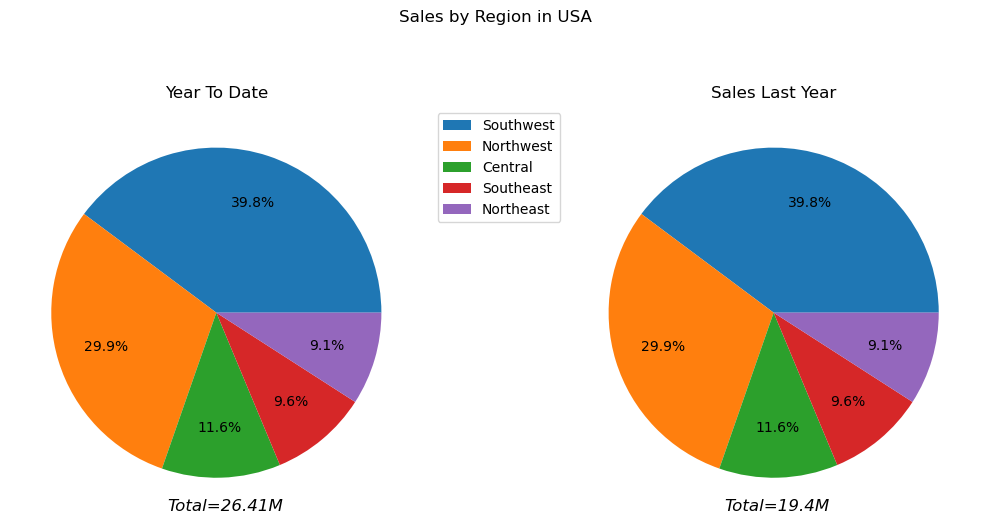

In [ ]:
##Q1C Pie chart of year to date Sales by US Region
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.pie(df_us['SalesYTD'],autopct='%1.1f%%',pctdistance=0.7)
plt.title('Year To Date')
plt.text(-0.3,-1.2,f"Total={round((df_us['SalesYTD'].sum()/1000000),2)}M",fontsize='large',style='oblique')
# Pie chart of last year Sales by US Region
plt.subplot(1,2,2)
plt.pie(df_us['SalesYTD'],autopct='%1.1f%%',pctdistance=0.7)
plt.title('Sales Last Year')
plt.text(-0.3,-1.2,f"Total={round((df_us['SalesLastYear']).sum()/1000000,2)}M",fontsize='large',style='oblique')

plt.legend(df_us['Name'], bbox_to_anchor=(0,1))
plt.suptitle('Sales by Region in USA')
plt.tight_layout()
plt.show()

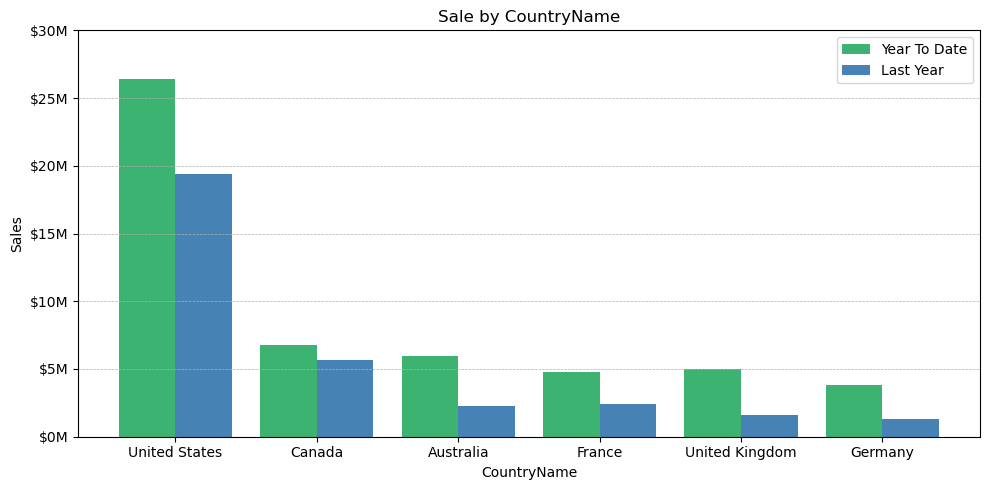

In [ ]:
##Q3A Sales Last Year and Year To Date by CountryName- clustered bar chart
query="""select c.Name as CountryName, 
round(sum(SalesYTD), 2) AS SalesYTD, 
round(sum(SalesLastYear), 2) AS SalesLastYear
from Sales.SalesTerritory as s
inner join person.CountryRegion as c
on s.CountryRegionCode=c.CountryRegionCode
group by c.Name
order by sum(SalesYTD)+sum(SalesLastYear) desc"""
df_country=pd.read_sql_query(query, conn)
df_country
# Clustered bar chart for Sales by Country
plt.figure(figsize=(10,5))
X_axis=np.arange(len(df_country['CountryName']))
plt.bar(X_axis-0.2,df_country['SalesYTD'],0.4,
        label='Year To Date',color='mediumseagreen')
plt.bar(X_axis+0.2,df_country['SalesLastYear'],0.4,
        label='Last Year',color='steelblue')
plt.xticks(X_axis,df_country['CountryName'])
plt.yticks(ticks=[0,5000000,10000000,15000000,20000000,25000000,30000000],
           labels=['$0M','$5M','$10M','$15M','$20M','$25M','$30M'])
plt.xlabel('CountryName')
plt.ylabel('Sales')
plt.title('Sale by CountryName')
plt.legend()
plt.grid(axis='y',linestyle='--',linewidth=0.5)
plt.tight_layout()

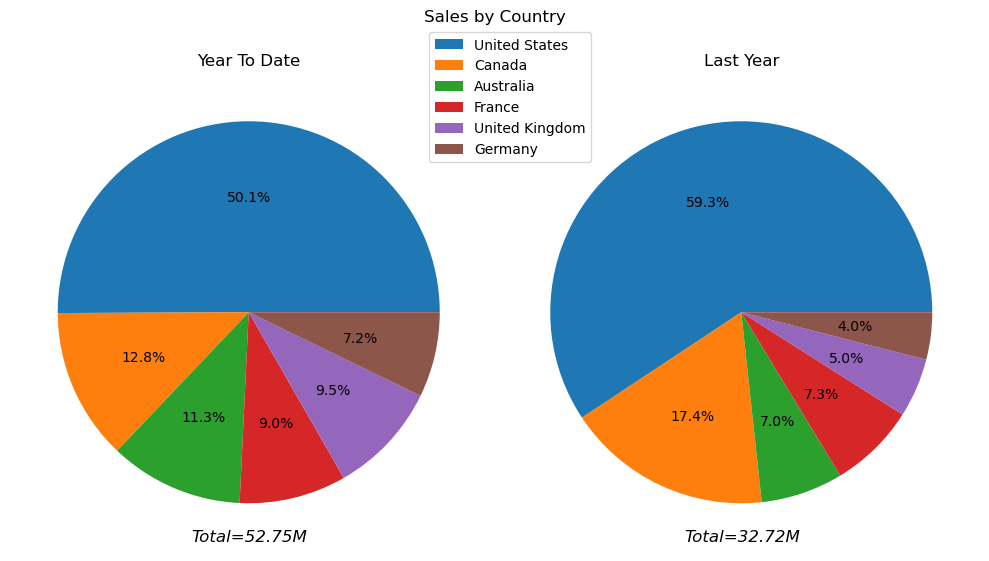

In [ ]:
##Q3B Sales Last Year and Year To Date by CountryName-Pie Chart
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.pie(df_country['SalesYTD'],autopct='%1.1f%%')
plt.title('Year To Date')
plt.text(-0.3,-1.2,f"Total={round((df_country['SalesYTD'].sum()/1000000),2)}M",fontsize='large',style='oblique')

### Pie chart of last year of sales
plt.subplot(1,2,2)
plt.pie(df_country['SalesLastYear'],autopct='%1.1f%%')
plt.title('Last Year')
plt.text(-0.3,-1.2,f"Total={round((df_country['SalesLastYear'].sum()/1000000),2)}M",fontsize='large',style='oblique')


plt.suptitle('Sales by Country',fontsize='large')
plt.tight_layout()
plt.legend(df_country['CountryName'],bbox_to_anchor=(0.2,0.8))


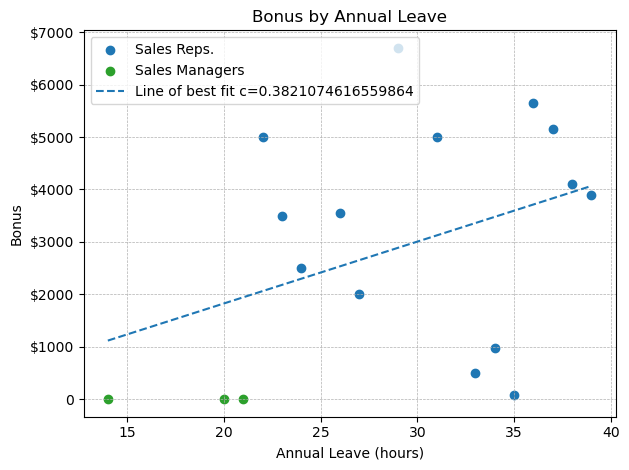

<Figure size 640x480 with 0 Axes>

In [ ]:
##Q2A Bonus By Annual Leave
from scipy import stats
query="""
select VacationHours as annual_leave,
JobTitle,
Bonus, 
SalesQuota,
round(sum(SalesYTD),2) as SalesYTD
from HumanResources.Employee as hre
inner join sales.SalesPerson as s
on hre.BusinessEntityID=s.BusinessEntityID
group by  VacationHours,
JobTitle,
Bonus, 
SalesQuota
order by annual_leave;"""
df_bonus_leave=pd.read_sql_query(query, conn)
pearson_coef,p_value=stats.pearsonr(df_bonus_leave['annual_leave'],df_bonus_leave['Bonus'])
a,b=np.polyfit(df_bonus_leave['annual_leave'],df_bonus_leave['Bonus'],1)
df_bonus_leave['Sale?']=df_bonus_leave['JobTitle'].str.startswith("Sales")
plt.scatter(df_bonus_leave[df_bonus_leave['Sale?']==True]['annual_leave'],df_bonus_leave[df_bonus_leave['Sale?']==True]['Bonus'],color='tab:blue',label="Sales Reps.")
plt.scatter(df_bonus_leave[df_bonus_leave['Sale?']==False]['annual_leave'],df_bonus_leave[df_bonus_leave['Sale?']==False]['Bonus'],color='tab:green',label="Sales Managers")
plt.plot(df_bonus_leave['annual_leave'],a*df_bonus_leave['annual_leave']+b,linestyle='--',label=f'Line of best fit c={pearson_coef}')
plt.yticks(ticks=[0,1000,2000,3000,4000,5000,6000,7000],
           labels=['0','$1000','$2000','$3000','$4000','$5000','$6000','$7000'])
plt.xlabel('Annual Leave (hours)')
plt.ylabel('Bonus')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title("Bonus by Annual Leave")
plt.tight_layout()
plt.show()
plt.clf()


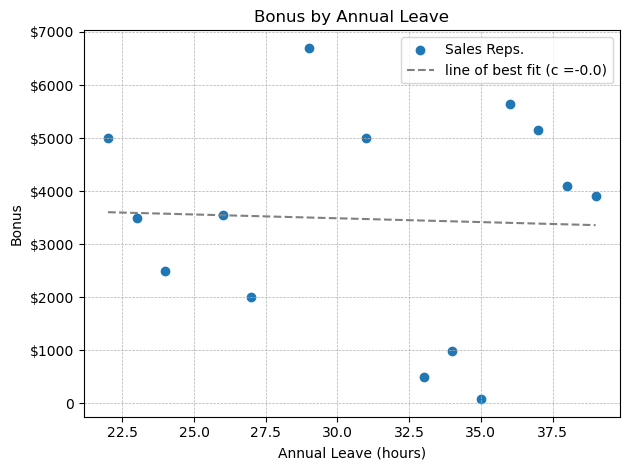

<Figure size 640x480 with 0 Axes>

In [ ]:
##Q2B Bonus by Annual Leave - Sales Representatives
df_sales=df_bonus_leave[df_bonus_leave['Sale?']]
pearson_coef,p_value=stats.pearsonr(df_sales['annual_leave'],df_sales['Bonus'])
a,b=np.polyfit(df_sales['annual_leave'],df_sales['Bonus'],1)
plt.scatter(df['annual_leave'],df['Bonus'],color = "tab:blue",label = "Sales Reps.")
plt.plot(df['annual_leave'], a * df['annual_leave'] + b,linestyle = '--',c= 'grey',label=f'line of best fit (c ={round(pearson_coef,1)})')
plt.yticks(ticks=[0,1000,2000,3000,4000,5000,6000,7000],
           labels=['0','$1000','$2000','$3000','$4000','$5000','$6000','$7000'])
plt.xlabel('Annual Leave (hours)')
plt.ylabel('Bonus')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title("Bonus by Annual Leave")
plt.tight_layout()
plt.show()
plt.clf()

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

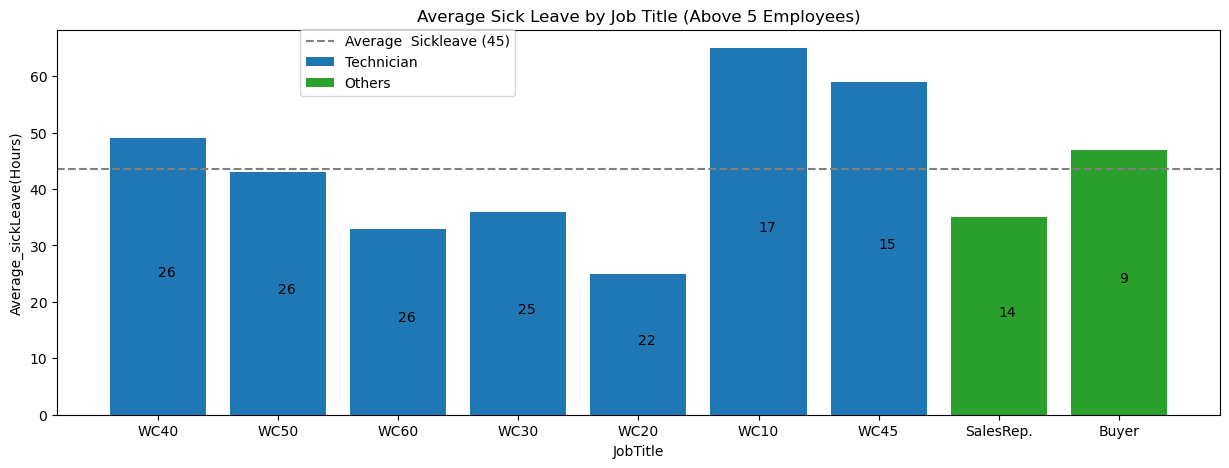

In [ ]:
##Q4A Sick Leave Titles above 5 Employees
import pandas as pd
query="""select replace(replace(replace(replace(JobTitle,'Production',' '),'Representative','Rep.'),'-',''),' ','') as Title,
OrganizationLevel,
avg(SickLeaveHours) as Average_SickLeave,
count(*) as Num_Employees
from HumanResources.Employee
group by JobTitle, OrganizationLevel
order by count(*) desc;
"""
df=pd.read_sql_query(query, conn)
df_above_5=df[df['Num_Employees']>5]
df_above_5['Technician?']=df_above_5['Title'].str.startswith('Technician')
plt.figure(figsize=(15,5))
plt.bar(df_above_5[df_above_5['Technician?']==True]['Title'],df_above_5[df_above_5['Technician?']==True]['Average_SickLeave'],color='tab:blue',label='Technician')
plt.bar(df_above_5[df_above_5['Technician?']==False]['Title'],df_above_5[df_above_5['Technician?']==False]['Average_SickLeave'],color='tab:green',label='Others')
plt.legend()
plt.axhline(y=df_above_5['Average_SickLeave'].mean(),linestyle = '--',c= 'grey',label='Average  Sickleave (45)')
plt.xlabel('JobTitle')
plt.ylabel('Average_sickLeave(Hours)')
plt.title("Average Sick Leave by Job Title (Above 5 Employees)")
plt.legend(bbox_to_anchor=(0.4, 1.02))
for i in range(len(df_above_5['Average_SickLeave'])):
    plt.text(df_above_5['Title'][i],df_above_5['Average_SickLeave'].values[i]/2,df_above_5['Num_Employees'][i])
plt.xticks(ticks = list(df_above_5["Title"]),labels= [title.replace("Technician","") for title in df_above_5['Title']])
plt.tight_layout

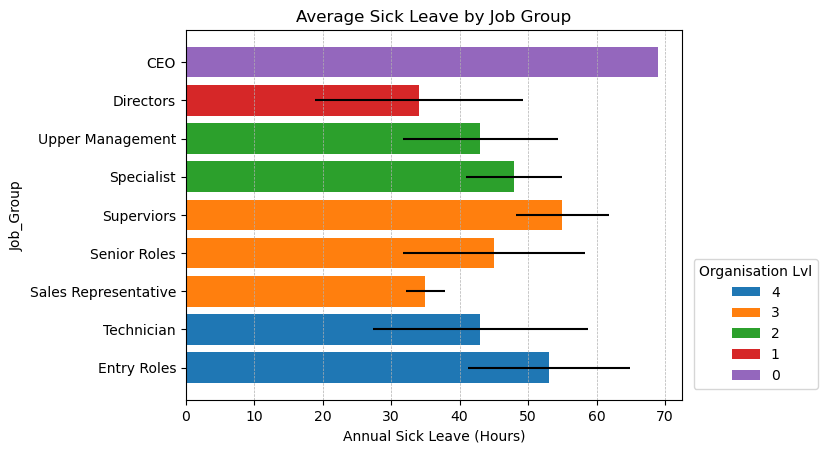

In [11]:
##Q4B Average Sick Leave by Job Group
query="""
with sick_leave_hours as(
select cast(isnull(OrganizationLevel,0) as int) as OrganizationLevel,
JobTitle,
SickLeaveHours,
case  
	when OrganizationLevel is null or OrganizationLevel=0 then 'CEO'
	When OrganizationLevel=1 then 'Directors'
	When OrganizationLevel=2 and JobTitle like '%Specialist%' then 'Specialist'
	When OrganizationLevel=2 then 'Upper Management'
	When OrganizationLevel=3 and JobTitle like '%Supervisor%' then 'Superviors'
	When OrganizationLevel=3 and JobTitle like '%Sales%' then 'Sales Representative'
	When OrganizationLevel=3 then 'Senior Roles'
	When OrganizationLevel=4 and JobTitle like '%Technician%' then 'Technician'
	WHEN OrganizationLevel=4 then 'Entry Roles'
	else 'JobTitle' end as Job_Group
from HumanResources.Employee
)
select Job_Group,
OrganizationLevel,
avg(SickLeaveHours) as Sick_Leave,
stdev(SickLeaveHours) as Deviation,
count(*) as Number_Employees
from sick_leave_hours
group by job_group,
OrganizationLevel
"""
df_group=pd.read_sql_query(query,conn)
df_group
for i in list(set(df_group['OrganizationLevel']))[::-1]:
    df_group_i=df_group[df_group['OrganizationLevel']==i]
    plt.barh(df_group_i['Job_Group'],df_group_i['Sick_Leave'],label=i,xerr=df_group_i['Deviation'])
plt.xlabel('Annual Sick Leave (Hours)')
plt.ylabel('Job_Group')
plt.title("Average Sick Leave by Job Group")
plt.grid(axis='x',linestyle='--',linewidth=0.5)
plt.legend()
plt.legend(bbox_to_anchor=(1.01, 0.4), loc='upper left', title = 'Organisation Lvl')
plt.show()

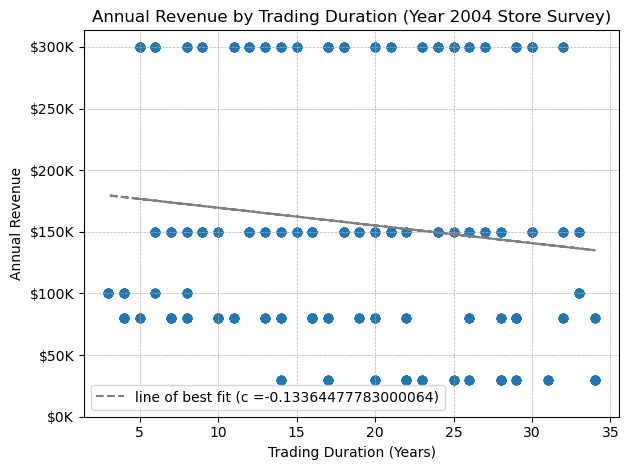

<Figure size 640x480 with 0 Axes>

In [ ]:
##Q5A#Graph 1 Annual Revenue by Trading Duration (Year 2004 Store Survey)
from scipy import stats
query="""
select YearOpened, 2004 - YearOpened AS Trading_Duration, BusinessType, Specialty, SquareFeet , AnnualRevenue 
from Sales.vStoreWithDemographics
order by SquareFeet desc
"""
df_duration=pd.read_sql_query(query,conn)


pearson_coef,p_value=stats.pearsonr(df_duration['Trading_Duration'],df_duration['AnnualRevenue'])
a,b=np.polyfit(df_duration['Trading_Duration'],df_duration['AnnualRevenue'],1)

plt.scatter(df_duration['Trading_Duration'],df_duration['AnnualRevenue'])
plt.plot(df_duration['Trading_Duration'],a*df_duration['Trading_Duration']+b,color='grey',linestyle='--',label=f'line of best fit (c ={pearson_coef})')
plt.yticks(ticks = [0,50000,100000,150000,200000,250000,300000],
           labels = ['$0K','$50K','$100K','$150K','$200K','$250K','$300K'])
plt.xlabel('Trading Duration (Years)')
plt.ylabel('Annual Revenue')
plt.title("Annual Revenue by Trading Duration (Year 2004 Store Survey)")
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend()
plt.tight_layout()
plt.show()
plt.clf()


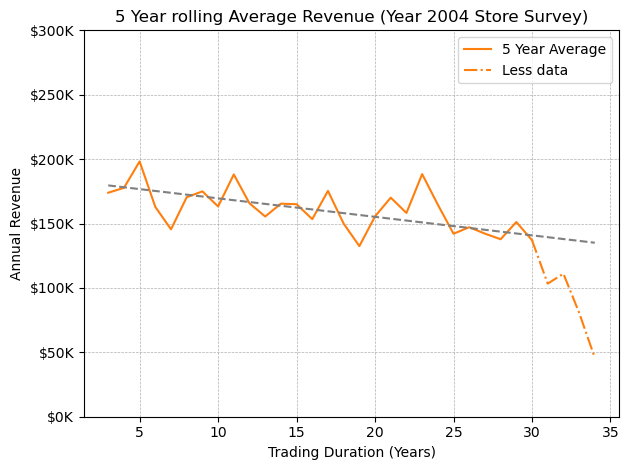

<Figure size 640x480 with 0 Axes>

In [19]:
#Q5B: Graph 2: 5 Year rolling Average Revenue (Store Survey)

years = np.array(list(range(min(df_duration['Trading_Duration']),max(df_duration['Trading_Duration'])+1)))
average_revenue=[df_duration[(df_duration['Trading_Duration']>=i)&(df_duration['Trading_Duration']<i+5)]['AnnualRevenue'].mean() for i in years]
plt.plot(years[:-4],average_revenue[:-4],label='5 Year Average',c='tab:orange')
plt.plot(years[-5:],average_revenue[-5:],label='Less data',linestyle = '-.',c='tab:orange')
plt.plot(years,a*years+b,linestyle='--',c='tab:grey')
plt.yticks(ticks = [0,50000,100000,150000,200000,250000,300000],
           labels = ['$0K','$50K','$100K','$150K','$200K','$250K','$300K'])
plt.xlabel('Trading Duration (Years)')
plt.ylabel('Annual Revenue')
plt.title("5 Year rolling Average Revenue (Year 2004 Store Survey)")
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend()
plt.tight_layout()
plt.show()
plt.clf()

([<matplotlib.axis.YTick at 0x2547c7ccd60>,
 [Text(0, 0, '$0'),
  Text(0, 25000, '$25K'),
  Text(0, 50000, '$50K'),
  Text(0, 75000, '$75K'),
  Text(0, 100000, '$100K'),
  Text(0, 125000, '$125K'),
  Text(0, 150000, '$150K'),
  Text(0, 175000, '$175K'),
  Text(0, 200000, '$200K')])

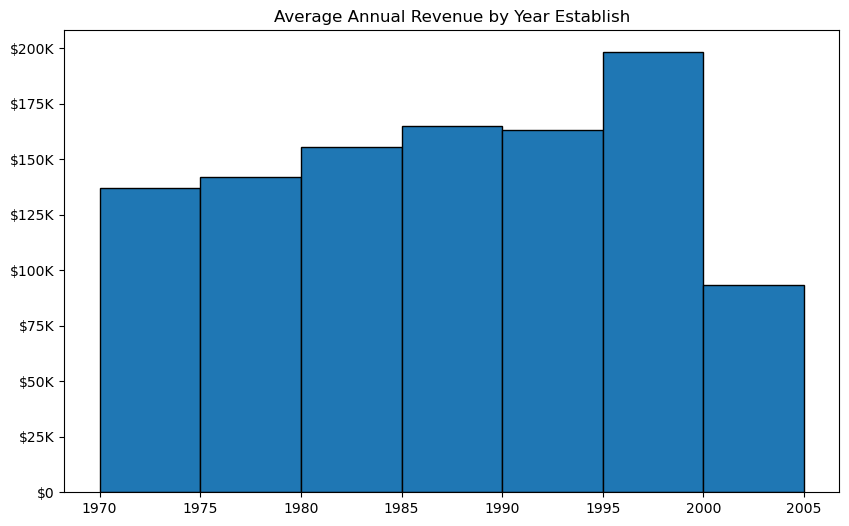

: 

In [ ]:
##Q5C/Graph 3:Average Annual Revenue by Year Established
plt.figure(figsize=(10,6))
bins=np.arange(1970,2010,5)
sum,_=np.histogram(df_duration['YearOpened'],bins=bins,weights=df_duration['AnnualRevenue'])
count,_=np.histogram(df_duration['YearOpened'],bins=bins)
avg=sum/count
plt.bar(bins[:-1],avg,width=5,align='edge', edgecolor="black")
plt.title('Average Annual Revenue by Year Establish')
plt.yticks(ticks=[0,25000,50000,75000,100000,125000,150000,175000,200000],
           labels=["$0","$25K","$50K","$75K","$100K","$125K","$150K","$175K","$200K"])


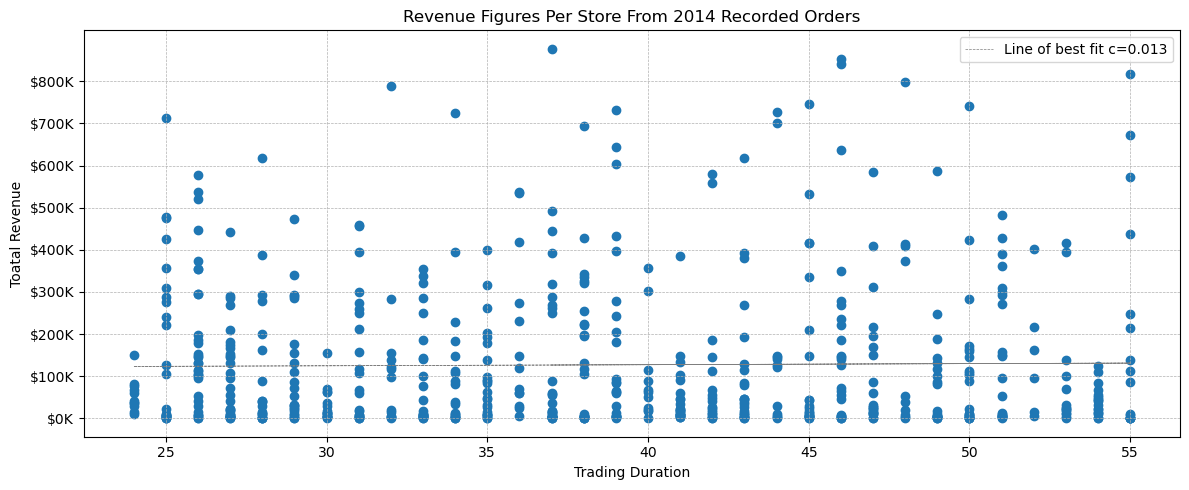

In [ ]:
##Q5D/Graph 4:Revenue Figures Per Store From Last Years Recorded Orders 2014
query="""
with store_revenue as (
select StoreID, 
sum(SubTotal) as Total_Revenue 
from sales.SalesOrderHeader as s
inner join sales.Customer as c
on s.CustomerID=c.CustomerID
group by StoreID)

select StoreID,
Total_Revenue,
2025-s.[Demographics].value('declare default element namespace "http://schemas.microsoft.com/sqlserver/2004/07/adventure-works/StoreSurvey";
(/StoreSurvey/YearOpened)[1]','integer') as Trading_Duration,
s.[Demographics].value('declare default element namespace "http://schemas.microsoft.com/sqlserver/2004/07/adventure-works/StoreSurvey";
(/StoreSurvey/AnnualSales)[1]','integer') as AnnualSales,
s.[Demographics].value('declare default element namespace "http://schemas.microsoft.com/sqlserver/2004/07/adventure-works/StoreSurvey";
(/StoreSurvey/AnnualRevenue)[1]','integer') as AnnualRevenue,
s.[Demographics].value('declare default element namespace "http://schemas.microsoft.com/sqlserver/2004/07/adventure-works/StoreSurvey";
(/StoreSurvey/SquareFeet)[1]','integer') as SquareFeet,
s.[Demographics].value('declare default element namespace "http://schemas.microsoft.com/sqlserver/2004/07/adventure-works/StoreSurvey";
(/StoreSurvey/NumberEmployees)[1]','integer') as NumberEmployees
from sales.store as s
inner join store_revenue as r
on s.BusinessEntityID=r.storeID
order by Total_Revenue desc
"""
df_stores=pd.read_sql_query(query,conn)
plt.figure(figsize=(12,5))
pearson_coef,p_value=stats.pearsonr(df_stores['Trading_Duration'],df_stores['Total_Revenue'])
a, b=np.polyfit(df_stores['Trading_Duration'],df_stores['Total_Revenue'],1)
plt.scatter(df_stores['Trading_Duration'],df_stores['Total_Revenue'],color='tab:blue')
plt.plot(df_stores['Trading_Duration'],a*df_stores['Trading_Duration']+b,color='tab:grey',linestyle='--',linewidth=0.5,
         label=f'Line of best fit c={round(pearson_coef,3)}')
plt.yticks( ticks = [0,100000,200000,300000,400000,500000,600000,700000,800000], 
            labels = ['$0K','$100K','$200K','$300K','$400K','$500K','$600K','$700K','$800K'])
plt.xlabel('Trading Duration')
plt.ylabel('Toatal Revenue')
plt.title("Revenue Figures Per Store From 2014 Recorded Orders")
plt.legend()
plt.grid(linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.show()

([<matplotlib.axis.YTick at 0x1987e12a590>,
 [Text(0, 0, '$0K'),
  Text(0, 50000, '$50K'),
  Text(0, 100000, '$100K'),
  Text(0, 150000, '$150K'),
  Text(0, 200000, '$200K'),
  Text(0, 250000, '$250K'),
  Text(0, 300000, '$300K')])

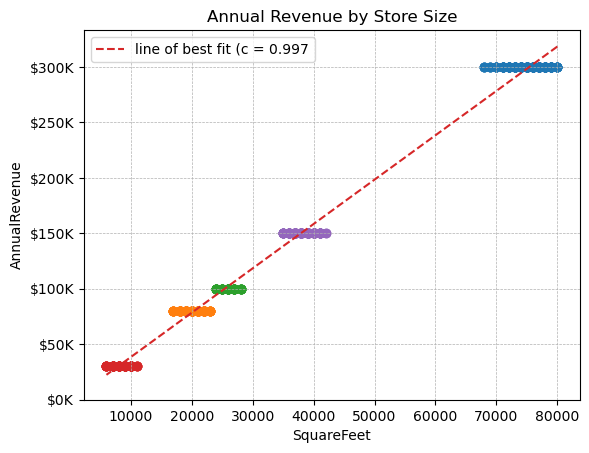

In [ ]:
##Q6A/Graph 1: Annual Revenue by Store Size
query="""
select SquareFeet, NumberEmployees, AnnualRevenue
from Sales.vStoreWithDemographics
order by squarefeet DESC"""
df=pd.read_sql(query,conn)
a,b=np.polyfit(df['SquareFeet'],df['AnnualRevenue'],1)
pearson_coef,p_value=stats.pearsonr(df['SquareFeet'],df['AnnualRevenue'])
for i in list(set(df['AnnualRevenue'])):
    df_i=df[df['AnnualRevenue']==i]
    plt.scatter(df_i['SquareFeet'],df_i['AnnualRevenue'])
plt.plot(df['SquareFeet'],a*df['SquareFeet']+b,linestyle='--',color='tab:red',label=f'line of best fit (c = {round(pearson_coef,3)}')
plt.legend()
plt.xlabel('SquareFeet')
plt.ylabel('AnnualRevenue')
plt.title("Annual Revenue by Store Size")
plt.grid(linestyle='--',linewidth=0.5)
plt.yticks( ticks = [0,50000,100000,150000,200000,250000,300000], 
            labels = ['$0K','$50K','$100K','$150K','$200K','$250K','$300K'])

([<matplotlib.axis.YTick at 0x1987f0e2b00>,
 [Text(0, 0, '$0K'),
  Text(0, 50000, '$50K'),
  Text(0, 100000, '$100K'),
  Text(0, 150000, '$150K'),
  Text(0, 200000, '$200K'),
  Text(0, 250000, '$250K'),
  Text(0, 300000, '$300K'),
  Text(0, 350000, '$350K')])

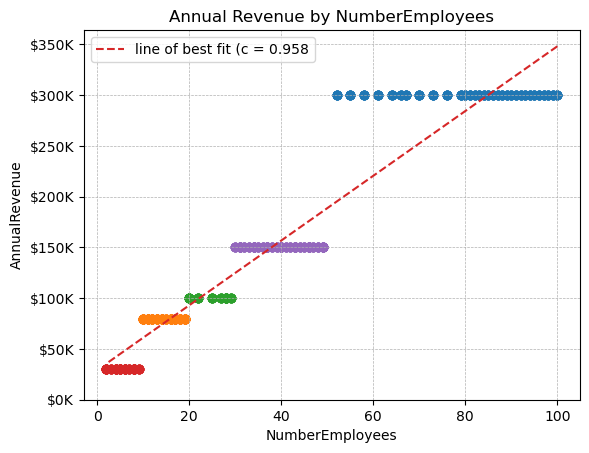

In [ ]:
##Q6B/# Graph 2: Annual Revenue by Number of Employees
a,b=np.polyfit(df['NumberEmployees'],df['AnnualRevenue'],1)
pearson_coef,p_value=stats.pearsonr(df['NumberEmployees'],df['AnnualRevenue'])
for i in list(set(df['AnnualRevenue'])):
    df_i=df[df['AnnualRevenue']==i]
    plt.scatter(df_i['NumberEmployees'],df_i['AnnualRevenue'])
plt.plot(df['NumberEmployees'],a*df['NumberEmployees']+b,linestyle='--',color='tab:red',label=f'line of best fit (c = {round(pearson_coef,3)}')
plt.legend()
plt.xlabel('NumberEmployees')
plt.ylabel('AnnualRevenue')
plt.title("Annual Revenue by NumberEmployees")
plt.grid(linestyle='--',linewidth=0.5)
plt.yticks( ticks = [0,50000,100000,150000,200000,250000,300000,350000], 
            labels = ['$0K','$50K','$100K','$150K','$200K','$250K','$300K','$350K'])

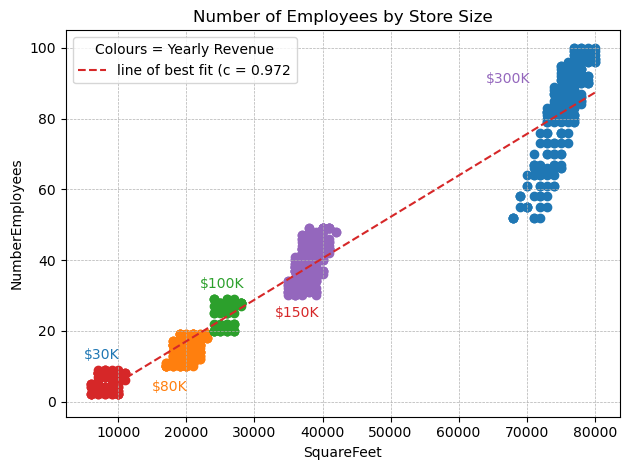

In [ ]:
##Q6C/# Graph 3: Number of Employees by Store Size
query="""
select SquareFeet, NumberEmployees, AnnualRevenue
from Sales.vStoreWithDemographics
order by squarefeet DESC"""
df=pd.read_sql(query,conn)
a,b=np.polyfit(df['SquareFeet'],df['NumberEmployees'],1)
pearson_coef,p_value=stats.pearsonr(df['SquareFeet'],df['NumberEmployees'])
for i in list(set(df['AnnualRevenue'])):
    df_i=df[df['AnnualRevenue']==i]
    plt.scatter(df_i['SquareFeet'],df_i['NumberEmployees'])
plt.plot(df['SquareFeet'],a*df['SquareFeet']+b,linestyle='--',color='tab:red',label=f'line of best fit (c = {round(pearson_coef,3)}')
plt.legend()
plt.xlabel('SquareFeet')
plt.ylabel('NumberEmployees')
plt.title("Number of Employees by Store Size")
plt.grid(linestyle='--',linewidth=0.5)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend(title = 'Colours = Yearly Revenue')
bins=np.arange(0,80000,10000)
plt.text(x = 5000.5,y = 12,s = '$30K', c = 'tab:blue')
plt.text(x = 15000.5,y = 3,s = '$80K', c = 'tab:orange')
plt.text(x = 22000.5,y = 32,s = '$100K', c = 'tab:green')
plt.text(x = 33000.5,y = 24,s = '$150K', c = 'tab:red')
plt.text(x = 64000,y = 90,s = '$300K', c = 'tab:purple')
plt.tight_layout()
plt.show()